In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
new_df = pd.read_pickle('frame_1.pkl')

In [3]:
new_df2 = pd.read_pickle('frame_2.pkl')

In [4]:
new_df.head(1)

,Horror,Thriller,Drama,Crime,Comedy,Action,Adventure,Numpy_Img,Orig_Img
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,"[[[222, 142, 104], [239, 144, 111], [231, 100,...","[[[247, 172, 132], [216, 132, 95], [255, 166, ..."


In [6]:
new_df2.head()

,Horror,Thriller,Drama,Crime,Comedy,Action,Adventure,Numpy_Img,Orig_Img
0,1.0,0.0,0,0.0,0.0,1.0,1.0,"[[[8, 0, 0], [8, 0, 0], [8, 0, 0], [8, 0, 0], ...","[[[8, 0, 0], [8, 0, 0], [8, 0, 0], [8, 0, 0], ..."
1,1.0,0.0,0,0.0,0.0,0.0,0.0,"[[[30, 30, 30], [26, 26, 26], [27, 27, 27], [3...","[[[31, 31, 31], [28, 28, 28], [28, 28, 28], [2..."
2,0.0,0.0,0,0.0,0.0,1.0,0.0,"[[[8, 9, 14], [7, 8, 13], [7, 8, 13], [6, 7, 1...","[[[8, 9, 14], [7, 8, 13], [7, 8, 13], [7, 8, 1..."
3,1.0,0.0,0,0.0,0.0,0.0,0.0,"[[[30, 30, 30], [26, 26, 26], [27, 27, 27], [3...","[[[31, 31, 31], [28, 28, 28], [28, 28, 28], [2..."
4,0.0,0.0,0,0.0,1.0,0.0,0.0,"[[[184, 207, 134], [147, 168, 111], [77, 95, 5...","[[[182, 206, 130], [178, 201, 131], [146, 167,..."


In [7]:
full_df = pd.concat([new_df, new_df2])

In [8]:
full_df = full_df.reset_index()

In [9]:
col_list = []

In [10]:
for i in new_df.columns:
    col_list.append(i)

In [11]:
col_list.remove('Numpy_Img')
col_list.remove('Orig_Img')

In [12]:
genres_dict = {}

In [13]:
for i in col_list:   
    genres_dict[i] = np.sum(full_df[i])   
        

In [14]:
genres_dict

{'Horror': 963.0,
 'Thriller': 744.0,
 'Drama': 573.0,
 'Crime': 284.0,
 'Comedy': 913.0,
 'Action': 501.0,
 'Adventure': 194.0}

In [15]:
train=full_df.sample(frac=0.8,random_state=42)
test=full_df.drop(train.index)

In [23]:
train = train.drop('Orig_Img', axis = 1)

In [24]:
test = test.drop('Orig_Img', axis = 1)

In [25]:
train_dict = {}
for i in col_list:   
    train_dict[i] = np.sum(train[i])  

In [26]:
train_dict

{'Horror': 766.0,
 'Thriller': 581.0,
 'Drama': 459.0,
 'Crime': 235.0,
 'Comedy': 724.0,
 'Action': 411.0,
 'Adventure': 160.0}

In [27]:
test_dict = {}
for i in col_list:   
    test_dict[i] = np.sum(test[i])  

In [28]:
test_dict

{'Horror': 197.0,
 'Thriller': 163.0,
 'Drama': 114.0,
 'Crime': 49.0,
 'Comedy': 189.0,
 'Action': 90.0,
 'Adventure': 34.0}

In [29]:
train_mat = train.values
test_mat = test.values

In [30]:
np.save('train_mat.npy', train_mat)
np.save('test_mat.npy', test_mat)

Rescaled images on the left and original ones on the right are plotted below.

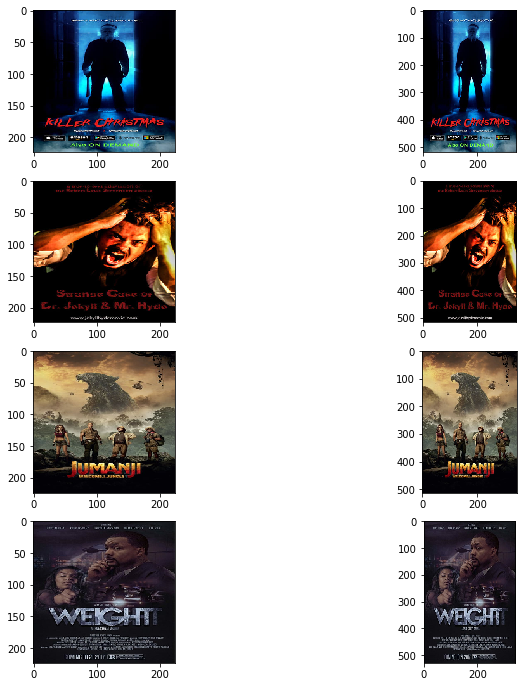

In [35]:
fig, ax = plt.subplots(figsize=(12,12))
plt.subplot(4,2,1)
plt.imshow(full_df['Numpy_Img'].loc[10])
plt.subplot(4,2,2)
plt.imshow(full_df['Orig_Img'].loc[10])

plt.subplot(4,2,3)
plt.imshow(full_df['Numpy_Img'].loc[15])
plt.subplot(4,2,4)
plt.imshow(full_df['Orig_Img'].loc[15])

plt.subplot(4,2,5)
plt.imshow(full_df['Numpy_Img'].loc[20])
plt.subplot(4,2,6)
plt.imshow(full_df['Orig_Img'].loc[20])

plt.subplot(4,2,7)
plt.imshow(full_df['Numpy_Img'].loc[35])
plt.subplot(4,2,8)
plt.imshow(full_df['Orig_Img'].loc[35])